In [1]:
import os

import cmasher as cmr
import cmcrameri.cm as cmc
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pywt
from numpy import format_float_scientific as ffc

%matplotlib inline

In [2]:
SMALL_SIZE = 26
MEDIUM_SIZE = 28
BIGGER_SIZE = 30

plt.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "pgf.texsystem": 'pdflatex',  # default is xetex
    }
)

plt.rc('font', size=MEDIUM_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)  # legend fontsize

In [3]:
nscenarios = 3

In [4]:
mean_files = ["uwavelet_jvla_means.npy", "uwavelet_red_jvla_means.npy"]

In [5]:
std_files = ["uwavelet_jvla_stds.npy", "uwavelet_red_jvla_stds.npy"]

In [6]:
scenarios_means = np.load(mean_files[0])
scenarios_red_means = np.load(mean_files[1])

scenarios_stds = np.load(std_files[0])
scenarios_red_stds = np.load(std_files[1])

In [7]:
scenarios_means.shape

(3, 4, 5)

In [8]:
use_wavelet = ["haar", "coif", "db", "dmey", "sym"]
# use_wavelet.remove("haar")
nwavelets = len(use_wavelet)
#idx_coif = [use_wavelet.index("coif") - 0.5, use_wavelet.index("db") - 0.5, use_wavelet.index("dmey") - 0.5,  use_wavelet.index("rbio") - 0.5, use_wavelet.index("sym") - 0.5]

In [9]:
# Getting minimum AICs wavelets
idx_sc1 = np.argmin(scenarios_means[0, 2])
idx_sc2 = np.argmin(scenarios_means[1, 2])
idx_sc3 = np.argmin(scenarios_means[2, 2])

In [10]:
# Getting minimum AICs wavelets + redundancy
idx_sc1_red = np.argmin(scenarios_red_means[0, 2])
idx_sc2_red = np.argmin(scenarios_red_means[1, 2])
idx_sc3_red = np.argmin(scenarios_red_means[2, 2])

In [11]:
delta_basis_means = np.load("deltaf_jvla_scenarios_means.npy")
delta_basis_stds = np.load("deltaf_jvla_scenarios_stds.npy")

In [12]:
delta_basis_means.shape

(3, 4)

In [13]:
print(
    "Scenario 1: Best AIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1], scenarios_means[0, 2, idx_sc1], scenarios_stds[0, 2, idx_sc1]
    )
)

print(
    "Scenario 1: Best AIC Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1_red], scenarios_red_means[0, 2, idx_sc1_red],
        scenarios_red_stds[0, 2, idx_sc1_red]
    )
)

print(
    "Scenario 1: Best AIC Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[0, 2], delta_basis_stds[0, 2]
    )
)

print(
    "Scenario 2: Best AIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2], scenarios_means[1, 2, idx_sc2], scenarios_stds[1, 2, idx_sc2]
    )
)

print(
    "Scenario 2: Best AIC Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2_red], scenarios_red_means[1, 2, idx_sc2_red],
        scenarios_red_stds[1, 2, idx_sc2_red]
    )
)

print(
    "Scenario 2: Best AIC Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[1, 2], delta_basis_stds[1, 2]
    )
)

print(
    "Scenario 3: Best AIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3], scenarios_means[2, 2, idx_sc3], scenarios_stds[2, 2, idx_sc3]
    )
)

print(
    "Scenario 3: Best AIC Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3_red], scenarios_red_means[2, 2, idx_sc3_red],
        scenarios_red_stds[2, 2, idx_sc3_red]
    )
)

print(
    "Scenario 3: Best AIC Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[2, 2], delta_basis_stds[2, 2]
    )
)

Scenario 1: Best AIC Wavelet family haar : -18823.76 \pm 260.78
Scenario 1: Best AIC Wavelet+Redundancy family db : -19644.59 \pm 414.10
Scenario 1: Best AIC Delta function family : -20248.78 \pm 60.24

Scenario 2: Best AIC Wavelet family haar : -20054.28 \pm 133.15
Scenario 2: Best AIC Wavelet+Redundancy family haar : -19984.59 \pm 168.32
Scenario 2: Best AIC Delta function family : -20231.11 \pm 55.93

Scenario 3: Best AIC Wavelet family haar : -18690.92 \pm 252.91
Scenario 3: Best AIC Wavelet+Redundancy family db : -19211.01 \pm 332.61
Scenario 3: Best AIC Delta function family : -20163.09 \pm 66.42



In [14]:
print(
    "Scenario 1: Best BIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1], scenarios_means[0, 3, idx_sc1], scenarios_stds[0, 3, idx_sc1]
    )
)

print(
    "Scenario 1: Best BIC Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1_red], scenarios_red_means[0, 3, idx_sc1_red],
        scenarios_red_stds[0, 3, idx_sc1_red]
    )
)

print(
    "Scenario 1: Best BIC Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[0, 3], delta_basis_stds[0, 3]
    )
)

print(
    "Scenario 2: Best BIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2], scenarios_means[1, 3, idx_sc2], scenarios_stds[1, 3, idx_sc2]
    )
)

print(
    "Scenario 2: Best BIC Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2_red], scenarios_red_means[1, 3, idx_sc2_red],
        scenarios_red_stds[1, 3, idx_sc2_red]
    )
)

print(
    "Scenario 2: Best BIC Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[1, 3], delta_basis_stds[1, 3]
    )
)

print(
    "Scenario 3: Best BIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3], scenarios_means[2, 3, idx_sc3], scenarios_stds[2, 3, idx_sc3]
    )
)

print(
    "Scenario 3: Best BIC Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3_red], scenarios_red_means[2, 3, idx_sc3_red],
        scenarios_red_stds[2, 3, idx_sc3_red]
    )
)

print(
    "Scenario 2: Best BIC Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[2, 3], delta_basis_stds[2, 3]
    )
)

Scenario 1: Best BIC Wavelet family haar : -16156.66 \pm 893.47
Scenario 1: Best BIC Wavelet+Redundancy family db : -18232.65 \pm 1254.23
Scenario 1: Best BIC Delta function family : -20093.34 \pm 120.40

Scenario 2: Best BIC Wavelet family haar : -19398.75 \pm 446.16
Scenario 2: Best BIC Wavelet+Redundancy family haar : -19203.41 \pm 612.72
Scenario 2: Best BIC Delta function family : -20019.56 \pm 116.71

Scenario 3: Best BIC Wavelet family haar : -15865.54 \pm 861.84
Scenario 3: Best BIC Wavelet+Redundancy family db : -16832.39 \pm 1064.69
Scenario 2: Best BIC Delta function family : -19887.35 \pm 119.22



In [15]:
print(
    "Scenario 1: Best PSNR Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1], scenarios_means[0, 0, idx_sc1], scenarios_stds[0, 0, idx_sc1]
    )
)

print(
    "Scenario 1: Best PSNR Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1_red], scenarios_red_means[0, 0, idx_sc1_red],
        scenarios_red_stds[0, 0, idx_sc1_red]
    )
)

print(
    "Scenario 1: Best PSNR Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[0, 0], delta_basis_stds[0, 0]
    )
)

print(
    "Scenario 2: Best PSNR Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2], scenarios_means[1, 0, idx_sc2], scenarios_stds[1, 0, idx_sc2]
    )
)

print(
    "Scenario 2: Best PSNR Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2_red], scenarios_red_means[1, 0, idx_sc2_red],
        scenarios_red_stds[1, 0, idx_sc2_red]
    )
)

print(
    "Scenario 2: Best PSNR Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[1, 0], delta_basis_stds[1, 0]
    )
)

print(
    "Scenario 3: Best PSNR Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3], scenarios_means[2, 0, idx_sc3], scenarios_stds[2, 0, idx_sc3]
    )
)

print(
    "Scenario 3: Best PSNR Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3_red], scenarios_red_means[2, 0, idx_sc3_red],
        scenarios_red_stds[2, 0, idx_sc3_red]
    )
)

print(
    "Scenario 3: Best PSNR Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[2, 0], delta_basis_stds[2, 0]
    )
)

Scenario 1: Best PSNR Wavelet family haar : 97.11 \pm 8.30
Scenario 1: Best PSNR Wavelet+Redundancy family db : 117.66 \pm 10.28
Scenario 1: Best PSNR Delta function family : 124.79 \pm 4.49

Scenario 2: Best PSNR Wavelet family haar : 9.70 \pm 0.75
Scenario 2: Best PSNR Wavelet+Redundancy family haar : 9.64 \pm 0.72
Scenario 2: Best PSNR Delta function family : 10.33 \pm 0.95

Scenario 3: Best PSNR Wavelet family haar : 96.22 \pm 7.80
Scenario 3: Best PSNR Wavelet+Redundancy family db : 114.13 \pm 9.43
Scenario 3: Best PSNR Delta function family : 123.53 \pm 5.72



In [16]:
#scenarios_means[:,1,:] *= 10**5
#scenarios_stds[:,1,:] *= 10**5
#delta_basis_means[:, 1] *= 10**5
#delta_basis_stds[:, 1] *= 10**5
#scenarios_red_means[:,1,:] *= 10**5
#scenarios_red_stds[:,1,:] *= 10**5

print(
    "Scenario 1: Best RMSE Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1], scenarios_means[0, 1, idx_sc1] * 10**5,
        scenarios_stds[0, 1, idx_sc1] * 10**5
    )
)

print(
    "Scenario 1: Best RMSE Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1_red], scenarios_red_means[0, 1, idx_sc1_red] * 10**5,
        scenarios_red_stds[0, 1, idx_sc1_red] * 10**5
    )
)

print(
    "Scenario 1: Best RMSE Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[0, 1] * 10**5, delta_basis_stds[0, 1] * 10**5
    )
)

print(
    "Scenario 2: Best RMSE Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2], scenarios_means[1, 1, idx_sc2] * 10**5,
        scenarios_stds[1, 1, idx_sc2] * 10**5
    )
)

print(
    "Scenario 2: Best RMSE Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2_red], scenarios_red_means[1, 1, idx_sc2_red] * 10**5,
        scenarios_red_stds[1, 1, idx_sc2_red] * 10**5
    )
)

print(
    "Scenario 2: Best RMSE Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[1, 1], delta_basis_stds[1, 1] * 10**5
    )
)

print(
    "Scenario 3: Best RMSE Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3], scenarios_means[2, 1, idx_sc3] * 10**5,
        scenarios_stds[2, 1, idx_sc3] * 10**5
    )
)

print(
    "Scenario 3: Best RMSE Wavelet+Redundancy family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3_red], scenarios_red_means[2, 1, idx_sc3_red] * 10**5,
        scenarios_red_stds[2, 1, idx_sc3_red] * 10**5
    )
)

print(
    "Scenario 3: Best RMSE Delta function family : {0:.2f} \pm {1:.2f}\n".format(
        delta_basis_means[2, 1] * 10**5, delta_basis_stds[2, 1] * 10**5
    )
)

Scenario 1: Best RMSE Wavelet family haar : 83.74 \pm 3.46
Scenario 1: Best RMSE Wavelet+Redundancy family db : 74.14 \pm 3.78
Scenario 1: Best RMSE Delta function family : 70.83 \pm 1.52

Scenario 2: Best RMSE Wavelet family haar : 70.92 \pm 1.38
Scenario 2: Best RMSE Wavelet+Redundancy family haar : 71.47 \pm 1.32
Scenario 2: Best RMSE Delta function family : 0.00 \pm 1.21

Scenario 3: Best RMSE Wavelet family haar : 85.97 \pm 4.26
Scenario 3: Best RMSE Wavelet+Redundancy family db : 75.87 \pm 3.68
Scenario 3: Best RMSE Delta function family : 71.85 \pm 1.62



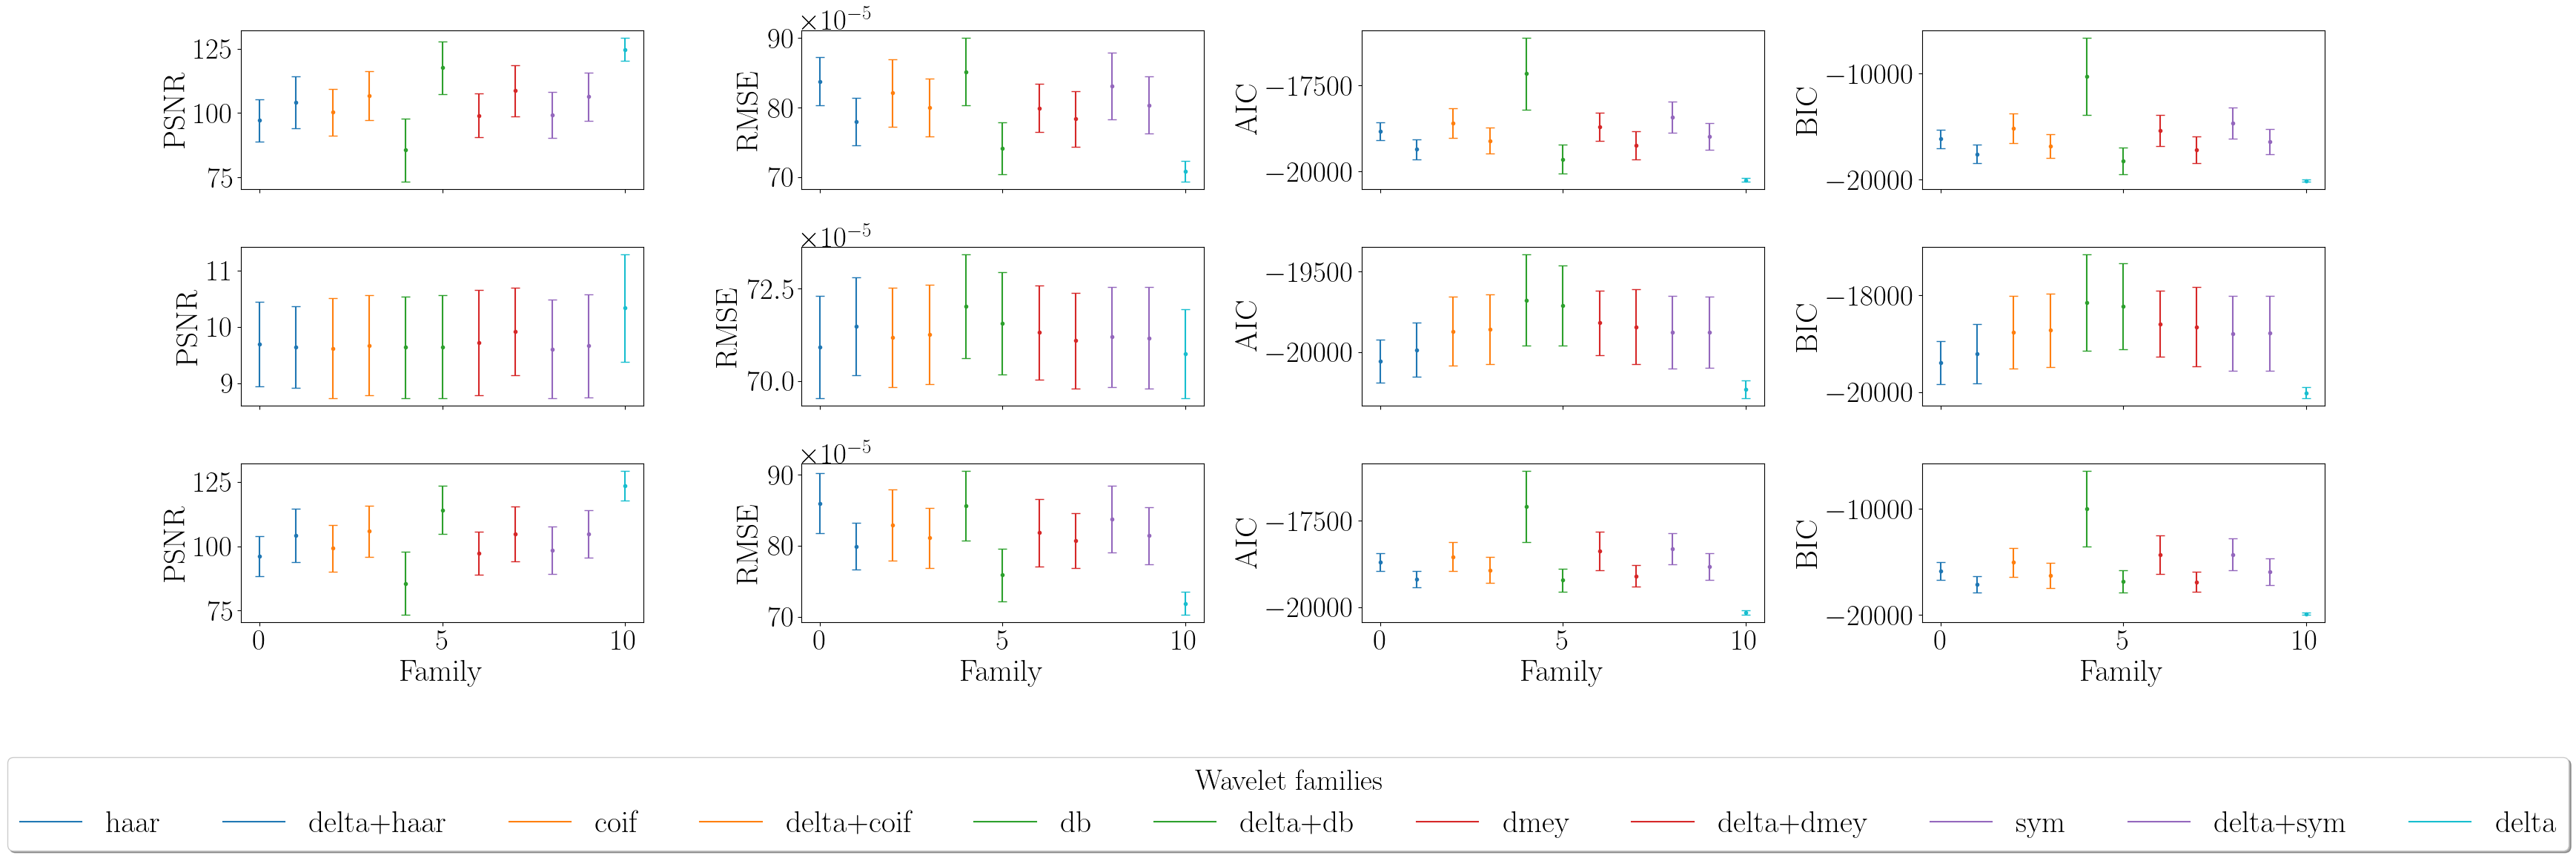

In [17]:
_id = np.arange(0, 2 * nwavelets, 2)
names = ["PSNR", "RMSE", "AIC", "BIC"]
fig, ax = plt.subplots(
    nrows=scenarios_means.shape[0], ncols=len(names), sharex='all', figsize=(30, 10)
)
#cmap = plt.get_cmap('tab20')
cmap = plt.get_cmap('tab10')
#cmap = cmc.roma
colors = [cmap(i) for i in np.linspace(0, 1, 2 * nwavelets + 1)]

ax[0, 1].ticklabel_format(axis="y", style='sci', scilimits=(-5, -5))
ax[1, 1].ticklabel_format(axis="y", style='sci', scilimits=(-5, -5))
ax[2, 1].ticklabel_format(axis="y", style='sci', scilimits=(-5, -5))

for i in range(scenarios_means.shape[0]):
    for j in range(len(names)):
        for k in range(scenarios_means.shape[2]):
            ax[i, j].plot(_id[k], scenarios_means[i, j, k], label=use_wavelet[k], color=colors[k])
            ax[i, j].plot(
                _id[k] + 1,
                scenarios_red_means[i, j, k],
                label="delta+" + use_wavelet[k],
                color=colors[k]
            )
            ax[i, j].errorbar(
                _id[k],
                scenarios_means[i, j, k],
                yerr=scenarios_stds[i, j, k],
                fmt='.',
                capsize=4,
                color=colors[k]
            )
            ax[i, j].errorbar(
                _id[k] + 1,
                scenarios_red_means[i, j, k],
                yerr=scenarios_red_stds[i, j, k],
                fmt='.',
                capsize=4,
                color=colors[k]
            )
            #if names[f] == "PSNR" and sc==3:
            #ax[sc-1,f].legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=19, fancybox=True, shadow=True, title="Wavelets")
            ax[i, j].set_ylabel(names[j])
        if i == 2:
            ax[i, j].set_xlabel("Family")
        ax[i, j].plot(_id[-1] + 1, delta_basis_means[i, j], label="delta", color=colors[-1])
        ax[i, j].errorbar(
            _id[-1] + 2,
            delta_basis_means[i, j],
            yerr=delta_basis_stds[i, j],
            fmt='.',
            capsize=4,
            color=colors[-1]
        )

#for k in range(len(idx_coif)):
#    for i in range(scenarios_means.shape[0]):
#        for j in range(len(names)):
#            ax[i,j].axvline(x = idx_coif[k], color = 'k', linestyle="--", alpha=0.8)

#for i in range(scenarios_means.shape[0]):
#ax[i,1].set_ylim([0,0.0015])
#ax[i,2].set_ylim([-25000,-20000])
#ax[i,3].set_ylim([-25000,-20000])

#ax[i,2].set_ylim([-25000,-15000]) #undecimated
#ax[i,3].set_ylim([-25000,17500]) #undecimated
undecimated = "_undecimated"
ofile_name = "families" + undecimated + "_wavelets_jvla.pdf"
#fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=19, fancybox=True, shadow=True, title="Wavelets")
#ax[len(scenarios)-1, 1].legend(loc='upper left', bbox_to_anchor=[1.0, -0.5], ncol=19, fancybox=True, shadow=True, title="Wavelets")
h, l = ax[0, 0].get_legend_handles_labels()
legend = fig.legend(
    h,
    l,
    loc='lower center',
    ncol=18,
    fancybox=True,
    bbox_to_anchor=[0.52, -0.2],
    shadow=True,
    title="Wavelet families"
)
# fig.suptitle("Delta dirac basis + Undecimated Wavelet")
fig.tight_layout()
if os.path.isfile(ofile_name):
    os.remove(ofile_name)  # Opt.: os.system("rm "+strFile)
fig.savefig(ofile_name, dpi=300, bbox_inches='tight')  #